#### https://online.stat.psu.edu/stat501/lesson/1/

In [1]:
import os

In [2]:
os.listdir()

['Lesson 4 - SLR Model Assumptions.ipynb',
 '.DS_Store',
 'STAT501_Lesson01',
 'Lesson 2 - SLR Model Evaluation.ipynb',
 'STAT501_Lesson04',
 'STAT501_Lesson03',
 'STAT501_Lesson02',
 '.ipynb_checkpoints',
 'Lesson 1 - Simple Linear Regression.ipynb']

In [3]:
filedir = 'STAT501_Lesson01'

In [4]:
os.listdir(filedir)

['fev_dat.txt',
 'mccoo.txt',
 '.DS_Store',
 'signdist.txt',
 'skincancer.txt',
 'infant.txt',
 'student_height_weight.txt',
 'practical.txt',
 'entrancescore_gpa.png',
 'carstopping.txt',
 'heightgpa.txt',
 'oldfaithful.txt',
 'drugdea.txt',
 'poverty.txt',
 'husbandwife.txt',
 'bldgstories.txt']

In [5]:
import pandas as pd

In [6]:
df = pd.read_table(os.path.join(filedir, 'student_height_weight.txt'))
df

,ht,wt
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162
5,71,156
6,71,169
7,72,165
8,73,181
9,75,208


In [7]:
import statsmodels.api as sm
X = df[['ht']]
y = df['wt']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.67
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           3.21e-05
Time:                        08:17:58   Log-Likelihood:                -34.639
No. Observations:                  10   AIC:                             73.28
Df Residuals:                       8   BIC:                             73.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -266.5344     51.032     -5.223      0.001    -384.214    -148.854
ht             6.1376      0.735      8.347      0.000       4.442       7.833
==============================================================================
Omnibus:                        0.036   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.137
Skew:                          -0.046   Prob(JB):                        0.934
Kurtosis:                       2.434   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

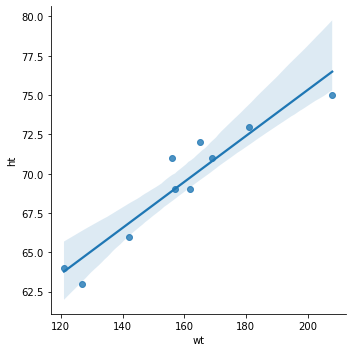

In [8]:
import seaborn as sns
sns.lmplot(x='wt',y='ht',data=df,fit_reg=True)

A line that fits the data "best" will be one with smallest error overall, i.e. minimize the sum of the squared prediction errors.

$$
\hat{y}_i = b_{0} + b_{1} x_i
$$

#### What do $b_0$ and $b_1$ estimate?

If we know the entire population, we do draw a population regression line; but we only have samples. We are interested in the population paramters, but we can only get sample estimates. In order to draw any conclusions about the population paramters, we have to make a few more assumptions about the behavior of the data in a regression setting.

(1) We try to figure out a linear relationship between x and y. Is it reasonable to assume X and Y are linearly related? Equiavalently, whether the mean of the error is zero.

(2) After linear regression, does it reasonable to assume that the errors are normally distributed?

(3) Does it seem reasonable to assume that the errors have equal variance?

(4) Does it also seem reasonable to assume that the error from one observation is independent of the error for another data point?

#### In summary, to do a simple linear regression, we need to check LINE assumptions: Linear, Independent, Normal distribution, Equal Variance

#### 1. Population Variance

We need to use sample variance to infer population variance

If we have just one population, we can easily estimate the sample variance by the formula <br><br>
$$
s^2 = \frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-1}
$$

Let's extend this thinking in the simple linear regression setting. Assume that $\sigma^2$ is the same for each of the subpopulations. There are 4 subpopulations depicted in the plot below. In general, there are as many as there are distinct x values in the population.

Each subpopulation has its own mean $\mu_Y$ which depends on x through $\mu_Y = E[Y] = \beta_0 + \beta_1 x$

And each subpopulation mean can be estimated using the estimated regression equation $\hat{y}_i = b_0 + b_1 x_i$

In [9]:
# import image module
from IPython.display import Image
  
# get the image
Image(url=os.path.join(filedir, "entrancescore_gpa.png"), width=600, height=600)

In this case we use the mean square error estimates, the common variance of the many subpopulations. <br><br>
$$
MSE = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-2}
$$

Why divided by n-2? To estimate MSE, we effectively estimate 2 parameters: the population intercept $\beta_0$ and the population slope $\beta_1$. Hence, we lose 2 degrees of freedom

#### MSE can be found in ANOVA table: Mean Squared Error = 74.67

In [10]:
from statsmodels.formula.api import ols

In [11]:
df['intercept'] = 1
model = ols('wt ~ intercept + ht', data=df).fit()

In [12]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,1123.600000,1123.600000,15.046889,0.004681
ht,1.0,4155.585106,4155.585106,55.650255,0.000072
Residual,8.0,597.385952,74.673244,NaN,NaN


#### 2. The Coefficient of Determination R2

Only shows a linear relationship

always between 0 and 1; the value itself is not that useful; sometimes even 0.2 can be quite big

Subject to outliers

Correlation (or association) does not imply causation. Mostly, an experiment can examine the causation; an observational study can't

A high r2 value does not imply that the slope is meaningfully different from 0. Because statistical significance does not imply practical significance. In general, the larger the data set, the easier it is to claim that the slope is not 0.

A large r2 value does not necessarily mean that a useful prediction can be made. It's possible to get prediction intervals or confidence intervals that are too wide to be useful.

#### 3. pearson correlation $\rho$

$$
\rho = b_1 \frac{\sigma_x}{\sigma_y}
$$

Take an example to show that a large r2 does not necessarily imply useful predictions. The Old Faithful dataset contains data on 21 consecutive eruptions of volcano. It's believed that one can predict the time until the next eruption (next), given the length of time of the last eruption (duration).

In [13]:
df = pd.read_table(os.path.join(filedir, 'oldfaithful.txt'))
df

,duration,next
0,2.0,50
1,1.8,57
2,3.7,55
3,2.2,47
4,2.1,53
5,2.4,50
6,2.6,62
7,2.8,57
8,3.3,72
9,3.5,62


In [14]:
df.corr()

,duration,next
duration,1.000000,0.865494
next,0.865494,1.000000


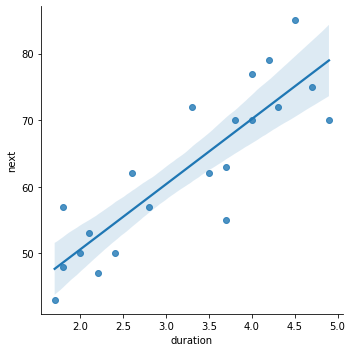

In [15]:
sns.lmplot(x='duration',y='next',data=df,fit_reg=True)

#### 4. Hypothesis Test for the Population Correlation Coefficient

In [16]:
df = pd.read_table(os.path.join(filedir, 'husbandwife.txt'))
df

,HAge,HHght,WAge,WHght,HAgeMar
0,49,1809,43,1590,25
1,25,1841,28,1560,19
2,40,1659,30,1620,38
3,52,1779,57,1540,26
4,58,1616,52,1420,30
...,...,...,...,...,...
213,51,1675,45,1550,25
214,64,1641,64,1570,30
215,44,1743,43,1560,25
216,40,1823,39,1630,23


Null hypothesis $H_0$: $\rho = 0$

Test Statistic: $$t^* = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$ <br>
This is a t-distribution with n-2 degrees of freedom

In [17]:
import numpy as np
def test_rho(n, r):
    return r * np.sqrt(n-2) / np.sqrt(1-r**2)

In [18]:
len(df)

218

In [19]:
mask = (df['HAge']=='*') | (df['WAge']=='*')
tmp = df[~mask]
tmp

,HAge,HHght,WAge,WHght,HAgeMar
0,49,1809,43,1590,25
1,25,1841,28,1560,19
2,40,1659,30,1620,38
3,52,1779,57,1540,26
4,58,1616,52,1420,30
...,...,...,...,...,...
213,51,1675,45,1550,25
214,64,1641,64,1570,30
215,44,1743,43,1560,25
216,40,1823,39,1630,23


In [20]:
tmp.loc[:, 'HAge'] = tmp['HAge'].astype(float)
tmp.loc[:, 'WAge'] = tmp['WAge'].astype(float)

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
len(tmp)

170

In [22]:
tmp.corr()

,HAge,WAge
HAge,1.00000,0.93856
WAge,0.93856,1.00000


In [23]:
test_rho(n=172-2, r=0.93856)

35.24937775886158

In [24]:
import scipy.stats

In [25]:
scipy.stats.t.cdf(35.24937775886158, df=172-2)

1.0

Final remark: if LINE assumptions are satisfied, we can do such t test.

#### Further example: Lung Function

In [26]:
df = pd.read_table(os.path.join(filedir, 'fev_dat.txt'))
df

,age,FEV,ht,sex,smoke
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0
...,...,...,...,...,...
649,16,4.270,67.0,1,1
650,15,3.727,68.0,1,1
651,18,2.853,60.0,0,0
652,16,2.795,63.0,0,1


In [27]:
X = df[['age']]
y = df['FEV']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     872.2
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          2.45e-122
Time:                        08:18:00   Log-Likelihood:                -556.51
No. Observations:                 654   AIC:                             1117.
Df Residuals:                     652   BIC:                             1126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4316      0.078      5.541      0.000       0.279       0.585
age            0.2220      0.008     29.533      0.000       0.207       0.237
==============================================================================
Omnibus:                       35.892   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.347
Skew:                           0.454   Prob(JB):                     7.08e-12
Kurtosis:                       4.030   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

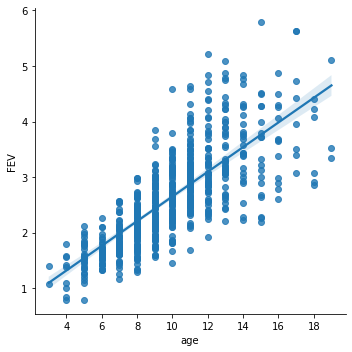

In [28]:
sns.lmplot(x='age',y='FEV',data=df,fit_reg=True)

Thie data presents a feature of non-constant variance. This can lead to problems. We'll explore in more detail later.